In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,49.622176,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.058472,0.084281,0.365536,2.680103,1.357545,14.574041
std,0.499031,78.524757,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.230465,0.109621,0.408358,2.353441,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.000000,0.017751,0.136692,0.450561,0.010526,0.104251
50%,1.000000,12.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.000000,0.045752,0.230747,1.945910,0.043478,0.238606
75%,1.000000,55.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.000000,0.088862,0.451218,5.065383,0.949402,24.144412
max,1.000000,291.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,1.386294,0.529903,2.183383,8.187960,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

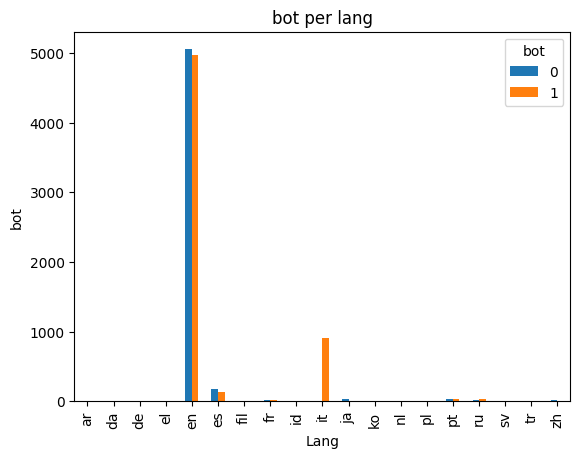

In [6]:
bot_xt_pct = pd.crosstab(data.lang, data["bot"])
bot_xt_pct.plot(kind='bar', stacked=False, 
                   title=f'bot per lang')
plt.xlabel('Lang')
plt.ylabel("bot")
plt.show()

In [7]:
def print_metrics(train_label, train_pred, test_label, test_pred):
    #evaulate the accuracy on the train set and the test set
    #metrics also contains precision, recall, f1 and the support
    print('Accuracy train set ', metrics.accuracy_score(train_label, train_pred))
    print('Accuracy test set ', metrics.accuracy_score(test_label, test_pred))
    print('Precision train set ', metrics.precision_score(train_label, train_pred, average='weighted'))
    print('Recall train set ', metrics.recall_score(train_label, train_pred, average='weighted'))
    print('F1 score train set ', metrics.f1_score(train_label, train_pred, average='weighted'))
    print('Support train set ', metrics.precision_recall_fscore_support(train_label, train_pred))

In [8]:
#metrics computed on the test set
def report_scores(test_label, test_pred):
    print(classification_report(test_label, 
                            test_pred, 
                            target_names=['<=50', '>50']))

In [9]:
#function to discretize the variables
#input: the dataset and the list of variables' names to discretize
def discretize_data(dataset, variables):
    for variable in variables:
        #get the unique variable's values
        var = sorted(dataset[variable].unique())
        
        #generate a mapping from the variable's values to the number representation  
        mapping = dict(zip(var, range(0, len(var) + 1)))

        #add a new colum with the number representation of the variable
        dataset[variable+'_num'] = dataset[variable].map(mapping).astype(int)
    return dataset

In [10]:
data = discretize_data(data, ["lang"])

In [11]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,4
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,4
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008,9
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619,4


In [12]:
# remove categorical variables
classification_features = list(data.columns)

for feat in ["lang", "bot", "created_at", "name"]:
# for feat in ["lang", "bot", "created_at", "name", "reply_count_entropy", "favorite_count_entropy"]:
    classification_fetures = classification_features.remove(feat)
    
print(classification_features)

['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'retweet_count_mean', 'retweet_count_std', 'lang_num']


In [13]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,reply_count_entropy,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.0,0.037879,0.190903,1.609438,0.037879,0.190903,4
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.0,0.049587,0.217090,1.791759,0.024793,0.155495,4
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,7,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.0,0.165387,0.530838,5.105129,0.826239,13.034008,9
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.0,0.056365,0.243387,5.248623,0.016772,0.142619,4


In [14]:
data_classification = data[classification_features]
data_label = data.pop("bot")

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_label, test_label = train_test_split(data_classification, data_label, stratify =data_label, test_size=0.30)

### Usage of Lang

In [16]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_set, train_label)

#predict on the test set
train_pred_gnb = gnb.predict(train_set)
test_pred_gnb = gnb.predict(test_set)

In [17]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8319056486654252
Accuracy test set  0.8372429771213438
Precision train set  0.8588227329376507
Recall train set  0.8319056486654252
F1 score train set  0.8268134873069072
Support train set  (array([0.95972644, 0.76986908]), array([0.66931638, 0.97523943]), array([0.78863565, 0.86046991]), array([3774, 4281]))


In [18]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.96      0.68      0.80      1618
         >50       0.78      0.97      0.86      1835

    accuracy                           0.84      3453
   macro avg       0.87      0.83      0.83      3453
weighted avg       0.86      0.84      0.83      3453



In [19]:
# cross validation
scores = cross_validate(gnb, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.0034883817036946616
Score time  0.0029435952504475913
Test score  0.8335195530726257
Train score  0.8328367473618871


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


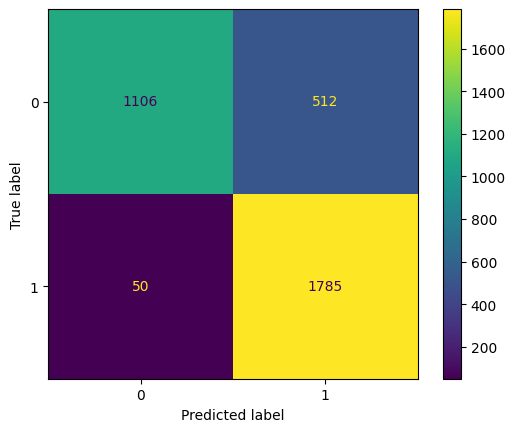

In [20]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb, test_set, test_label)
plt.show() 

In [21]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

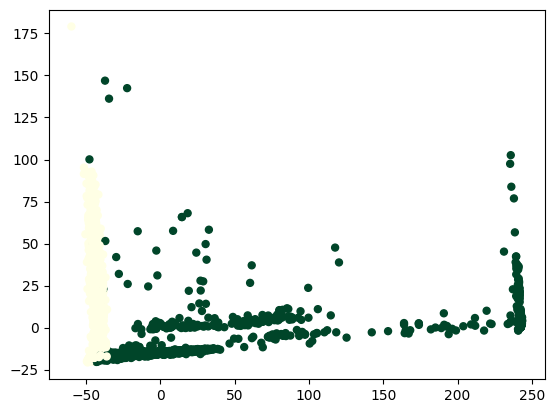

In [22]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25, cmap='YlGn');

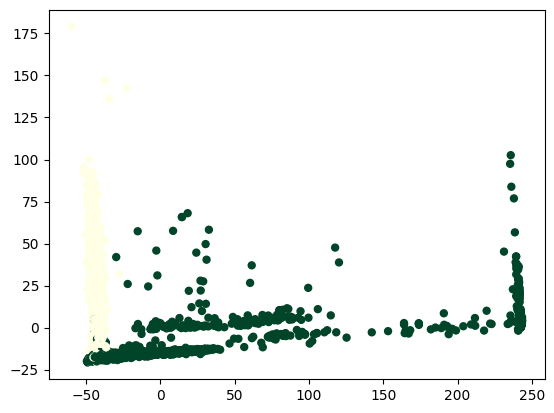

In [23]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25, cmap='YlGn');

In [24]:
# take a non bot user
non_bot_users = data_classification[data_label==0]
total_bot = (data_label==0).sum()

In [25]:
non_bot_users.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,retweet_count_mean,retweet_count_std,lang_num
2358850842,4,69.082645,15.041322,0.000000,0.338843,0.024793,0.000000,0.000000,0.049587,0.217090,0.024793,0.155495,4
2571493866,8,72.311246,14.582073,0.000825,0.506461,0.118229,0.000000,0.000000,0.056365,0.243387,0.016772,0.142619,4
2199062688,8,45.132176,9.732754,0.022672,0.926676,0.024120,0.000000,0.000000,0.045752,2.111569,0.043478,54.806831,4
3118659848,4,62.362963,12.807407,0.088889,0.807407,0.111111,0.000000,0.000000,0.045752,1.813741,7.355556,41.091851,4
616225564,7,66.850000,14.950000,0.033333,0.016667,0.233333,0.016667,0.128019,0.050000,0.284312,0.016667,0.128019,4


In [26]:
gnb.predict(non_bot_users).sum()/total_bot

0.3264094955489614

In [27]:
for lang in data.lang_num.unique():
    # substitute lang_num with 9 (italian), all the italian are bots
    modified_non_bot_users = non_bot_users.copy()
    modified_non_bot_users["lang_num"] = lang
    modified_non_bot_users.head()
    print(f"number bot classified with lang_num = {lang} : {gnb.predict(modified_non_bot_users).sum()/total_bot}")

number bot classified with lang_num = 4 : 0.320660237388724
number bot classified with lang_num = 9 : 0.3779673590504451
number bot classified with lang_num = 7 : 0.35293026706231456
number bot classified with lang_num = 15 : 0.5276335311572701
number bot classified with lang_num = 5 : 0.33086053412462907
number bot classified with lang_num = 17 : 0.6248145400593472
number bot classified with lang_num = 14 : 0.49258160237388726
number bot classified with lang_num = 12 : 0.4343471810089021
number bot classified with lang_num = 8 : 0.3642433234421365
number bot classified with lang_num = 18 : 0.6780415430267063
number bot classified with lang_num = 10 : 0.3948442136498516
number bot classified with lang_num = 2 : 0.334013353115727
number bot classified with lang_num = 11 : 0.4111646884272997
number bot classified with lang_num = 1 : 0.3449554896142433
number bot classified with lang_num = 0 : 0.3557121661721068
number bot classified with lang_num = 13 : 0.4629080118694362
number bot clas

### Removed Lang attribute for classification

In [28]:
del train_set["lang_num"]

In [29]:
train_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,retweet_count_mean,retweet_count_std
619324942,3,55.000000,12.250000,0.000000,0.000000,0.035714,0.0,0.0,0.000000,0.000000,0.000000,0.000000
341910065,9,53.660446,12.239297,0.023417,0.488840,0.144530,0.0,0.0,0.045752,0.832529,2.417490,23.612857
621615487,8,58.446242,12.368572,0.021935,0.820568,0.032722,0.0,0.0,0.045752,1.872832,10.869831,50.681656
467146379,118,84.098872,17.827472,0.021898,0.009290,0.083610,0.0,0.0,0.254811,0.639422,1.127405,14.131235
599736873,3,55.500000,12.550000,0.005109,0.400000,0.070423,0.0,0.0,0.100000,0.300000,6.125000,23.332582


In [30]:
del test_set["lang_num"]

In [31]:
test_set.head()

,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,retweet_count_mean,retweet_count_std
82523340,8,59.009539,13.151033,0.077901,0.875994,0.049285,0.0,0.000000,0.179650,0.643791,0.043478,111.229923
1174800103,14,58.187500,12.937500,0.000000,0.000000,0.125000,0.0,0.330719,0.000000,0.000000,0.000000,0.000000
1372026204,291,99.386598,14.694444,0.005109,0.394194,0.070423,0.0,0.000000,0.234400,0.528483,0.817960,3.740020
2954324322,7,59.672488,12.788468,0.024053,0.831960,0.070423,0.0,0.000000,0.076442,0.329877,12.674135,38.615379
2351548490,4,66.753623,15.043478,0.000000,0.297101,0.065217,0.0,0.000000,0.057971,0.289130,0.043478,0.203931


In [32]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb2 = GaussianNB()
gnb2.fit(train_set, train_label)

#predict on the test set
train_pred_gnb = gnb2.predict(train_set)
test_pred_gnb = gnb2.predict(test_set)

In [33]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8278088144009932
Accuracy test set  0.8302924992759919
Precision train set  0.8569128636632333
Recall train set  0.8278088144009932
F1 score train set  0.8222089096848271
Support train set  (array([0.96170213, 0.76453382]), array([0.65871754, 0.97687456]), array([0.78188394, 0.85775818]), array([3774, 4281]))


In [34]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.96      0.67      0.79      1618
         >50       0.77      0.97      0.86      1835

    accuracy                           0.83      3453
   macro avg       0.86      0.82      0.82      3453
weighted avg       0.86      0.83      0.83      3453



In [35]:
# cross validation
scores = cross_validate(gnb, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.0034522215525309243
Score time  0.0022293726603190103
Test score  0.8273122284295469
Train score  0.8276846679081316


/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


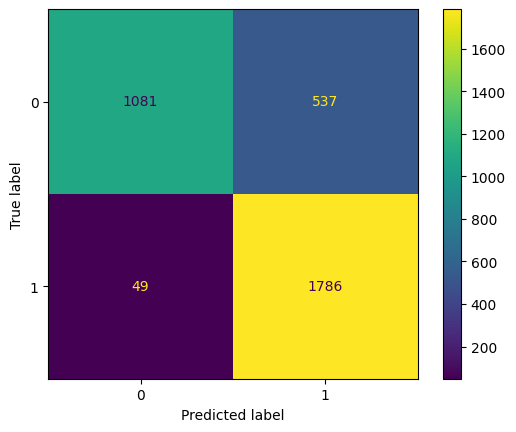

In [36]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb2, test_set, test_label)
plt.show() 

In [37]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

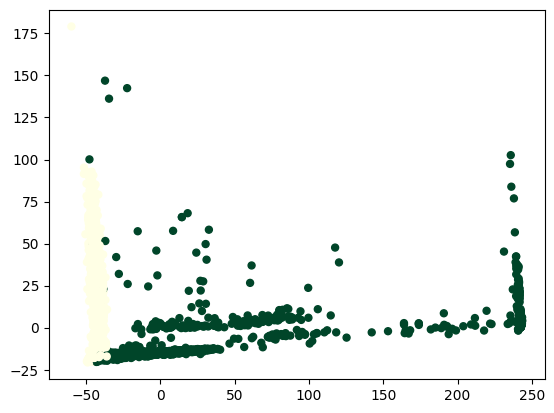

In [38]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25, cmap='YlGn');

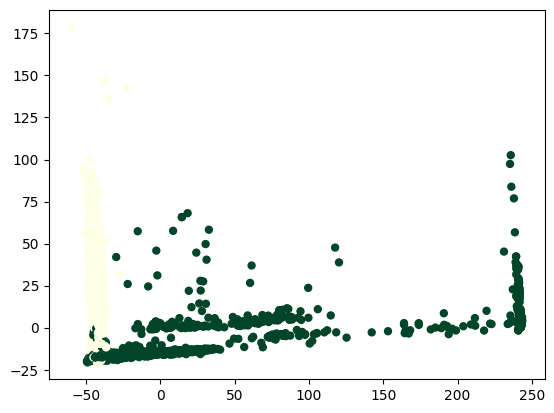

In [39]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25, cmap='YlGn');